# Reproducing results

## Create folder shortcut

**Before execute this notebook**, you need to add a shortcut to [llm4pfam_data](https://drive.google.com/drive/folders/1Wp5zzMUES1u4neGqrR2_FAwGylNG7v7h?usp=drive_link) folder in your drive to access needed files. Follow steps shown in pictures below:

First click on down arrow next to folder name (1) and move your mouse to organize (2). Then select add shortcut (3).

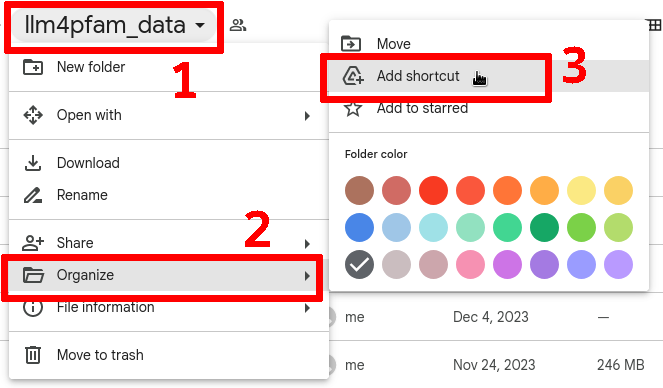

Then, go to All locations (4), select My Drive (5) and Add (6) to create shortcut to llm4pfam_data folder.

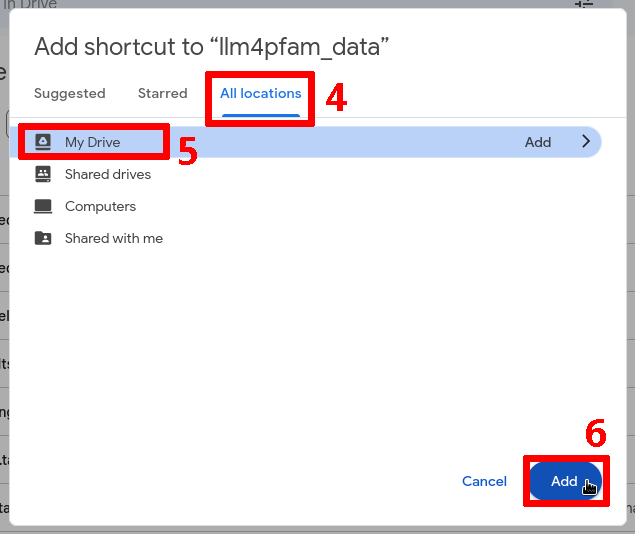

Now you can execute this notebook. Give access to your drive (don't worry for storage, this colab won't add any file or folder to your drive).

## Preparing environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
sh_folder="drive/"+[d for d in os.listdir("drive/") if "Drive" in d][0]+"/llm4pfam_data/"

In [ ]:
#@title Check if everything is ok.

!cat {sh_folder}testing_access/msg.txt

If you can read this message, you have accessed folder sucessfully. 

In [ ]:
#@title Clone repository
!git clone https://github.com/RosarioVitale/llm4pfam.git
!mv llm4pfam/src/ src/
!rm -r llm4pfam/

Cloning into 'llm4pfam'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 49 (delta 14), reused 9 (delta 2), pack-reused 0
Receiving objects: 100% (49/49), 233.08 KiB | 2.71 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
#@title Extract data folder
!tar -xf {sh_folder}data.tar.gz

In [ ]:
#@title Select embedding and model
Embedding = "ESM2" # @param ["ESM1b", "ESM1v", "ESM2", "ProtTrans-Bert-BFD", "ProtTrans-T5-XL-U50"]
Model = "CNN-E" # @param ["CNN-E", "MLP-E"]

demb = {"ESM1b":"esm1b", "ESM1v":"esm1v", "ESM2":"esm2",
        "ProtTrans-Bert-BFD":"protTransBertBFD",
        "ProtTrans-T5-XL-U50":"protTransT5XLU50"}
dmod = {"CNN-E":"cnn", "MLP-E":"mlp"}
embedding = demb[Embedding]
model = dmod[Model]

#@markdown And remember to **run** this cell after select options.

#@markdown Then execute all cells bellow.

In [ ]:
#@title Extract models folder
if os.path.exists("models/"):
  shutil.rmtree("models/")
!tar -xf {sh_folder}models/{model}/{embedding.lower()}.tar.gz
!mv {embedding} models/

In [ ]:
#@title Extract embeddings folder (may take a while)
if os.path.exists("embeddings/"):
  shutil.rmtree("embeddings/")

if model=="cnn":
  !tar -xf {sh_folder}embeddings_per_residue/{embedding}/test.tar.gz
  !mv test/ embeddings/
elif model=="mlp":
  !mkdir embeddings
  !cp {sh_folder}embeddings_per_sequence/{embedding}/test.npy embeddings/test.npy

## Testing model

In [ ]:
!python src/{model}/test.py --embeddings embeddings/

load weights from result_model03/weights.pk
100% 666/666 [03:35<00:00,  3.09it/s]
Error rate:    17.63%
Total errors:   3754
load weights from result_model05/weights.pk
100% 666/666 [03:48<00:00,  2.92it/s]
Error rate:    18.30%
Total errors:   3896
load weights from result_model04/weights.pk
100% 666/666 [03:43<00:00,  2.98it/s]
Error rate:    17.36%
Total errors:   3697
load weights from result_model01/weights.pk
100% 666/666 [03:46<00:00,  2.95it/s]
Error rate:    19.53%
Total errors:   4159
load weights from result_model02/weights.pk
100% 666/666 [03:56<00:00,  2.82it/s]
Error rate:    19.33%
Total errors:   4116

Ensemble score:
Error rate:     7.65%
Total errors:   1629


## Delete shortcut (optional)

To remove shortcut created, go to your drive, select shortcut, right click on it and move it to trash.

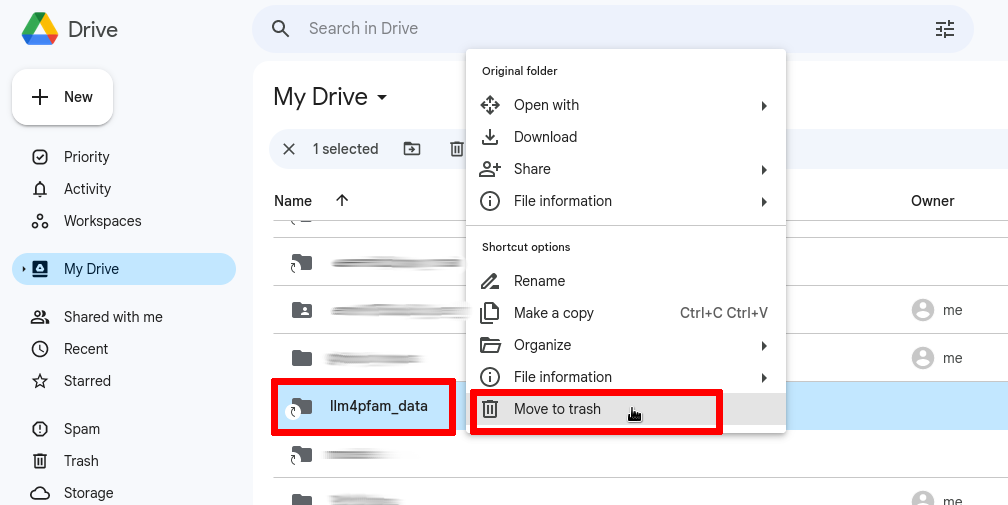